# **Hotel Booking Cancellation Prediction**

## Group 3
## Zwe Min Maw 6238135
## Saw Zwe Wai Yan 6318013
## Thanarit Kanjanametawat 6410322

# 1. Importing Dataset and Libraries

## 1.1 For Kaggle Environment

In [1]:
# data = pd.read_csv('/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv')
# 
# # Get the number of rows and columns in the DataFrame
# num_rows, num_columns = data.shape
# 
# # Print the number of rows
# print("Number of rows:", num_rows)

In [2]:
# # Load the data
# train_set = pd.read_csv('/kaggle/input/dataset/trainset.csv')
# test_set = pd.read_csv('/kaggle/input/dataset/testset.csv')

## 1.2 For GCP Environment

In [3]:
# Load the data in new environment
import numpy as np
import pandas as pd
train_set = pd.read_csv('dataset3/trainset.csv')
train_set_orginal = pd.read_csv('dataset3/trainset.csv')
test_set = pd.read_csv('dataset3/testset.csv')
test_set_orginal = pd.read_csv('dataset3/testset.csv')

# 1.3 Checking the data

In [4]:
print(train_set.shape)
print(test_set.shape)

(32648, 19)
(3627, 19)


In [5]:
train_set.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
train_set.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000
mean,1.844646,0.104876,0.812760,2.207026,0.031120,85.421098,2017.820571,7.423334,15.585151,0.026035,0.023034,0.157866,103.246899,0.620344
std,0.517766,0.399670,0.871686,1.414665,0.173644,86.064466,0.383717,3.074802,8.746361,0.159243,0.360494,1.796594,35.006863,0.785532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
# Check for missing values in the train dataset
train_missing = train_set.isnull().sum()

# Check for missing values in the test dataset
test_missing = test_set.isnull().sum()

print("Missing Values in Train Dataset:")
print(train_missing)

print("\nMissing Values in Test Dataset:")
print(test_missing)

Missing Values in Train Dataset:
Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Missing Values in Test Dataset:
Booking_ID                              0
no_of_adults                            0
no_of_children                         

In [8]:
train_set['booking_status'].value_counts()

Not_Canceled    21958
Canceled        10690
Name: booking_status, dtype: int64

# 2. Data Preprocessor and Feature Engineering

## 2.1 Lead Time Discretization

In [9]:
# Discretize the lead time in long medium short
# 0-50 short
# 50-100 medium
# 100-1000 long
train_set['lead_time'] = pd.cut(train_set['lead_time'], bins=[0, 50, 100, 1000], labels=['short', 'medium', 'long'])

In [10]:
train_set['lead_time'].value_counts()

short     14002
long      10750
medium     6733
Name: lead_time, dtype: int64

## 2.2 Label encoding

In [11]:
# Datatype changing
categorical=train_set.select_dtypes(exclude=[np.number])

for i in categorical.columns:
    train_set[i]=train_set[i].astype('category')

# Data Info

train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            32648 non-null  category
 1   no_of_adults                          32648 non-null  int64   
 2   no_of_children                        32648 non-null  int64   
 3   no_of_weekend_nights                  32648 non-null  int64   
 4   no_of_week_nights                     32648 non-null  int64   
 5   type_of_meal_plan                     32648 non-null  category
 6   required_car_parking_space            32648 non-null  int64   
 7   room_type_reserved                    32648 non-null  category
 8   lead_time                             31485 non-null  category
 9   arrival_year                          32648 non-null  int64   
 10  arrival_month                         32648 non-null  int64   
 11  ar

In [12]:
from sklearn.preprocessing import LabelEncoder,RobustScaler
# Data Labelencoding train
for i in categorical.columns.tolist():
    train_set[i]=LabelEncoder().fit_transform(train_set[i])
    test_set[i]=LabelEncoder().fit_transform(test_set[i])

# # Change booking_status to 0 (Not Canceled) and 1 (Canceled)
train_set['booking_status'] = train_set['booking_status'] ^ 1
test_set['booking_status'] = test_set['booking_status'] ^ 1



# Taking numerical values
train_num=train_set.select_dtypes(include=[np.number])
test_num=test_set.select_dtypes(include=[np.number])

#Selecting features & target variable
train_x=train_num.drop('booking_status',axis=1)
train_y=train_num['booking_status']

test_x=test_num.drop('booking_status',axis=1)
test_y=test_num['booking_status']

#Data Scaling
train_x=pd.DataFrame(RobustScaler().fit_transform(train_x.to_numpy()),columns=train_x.columns)
train_y=pd.DataFrame(train_y)

test_x=pd.DataFrame(RobustScaler().fit_transform(test_x.to_numpy()),columns=test_x.columns)
test_y=pd.DataFrame(test_y)


train_x.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,-1.0,0.4,-0.933333,-1.0,0.0,0.0,0.0,-0.867758,0.0
1,-0.999939,0.0,0.0,0.5,0.5,3.0,0.0,0.0,0.5,0.0,0.6,-0.666667,0.0,0.0,0.0,0.0,0.182116,1.0
2,-0.999877,-1.0,0.0,0.5,-0.5,0.0,0.0,0.0,0.5,0.0,-1.2,0.800000,0.0,0.0,0.0,0.0,-0.993703,0.0
3,-0.999816,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,-0.5,0.0,-0.6,0.266667,0.0,0.0,0.0,0.0,0.013854,0.0
4,-0.999755,0.0,0.0,0.0,-0.5,3.0,0.0,0.0,0.5,0.0,-0.8,-0.333333,0.0,0.0,0.0,0.0,-0.124685,0.0


In [13]:
train_y.value_counts()

booking_status
0                 21958
1                 10690
dtype: int64

## 2.3 Correlations between features and the target variable

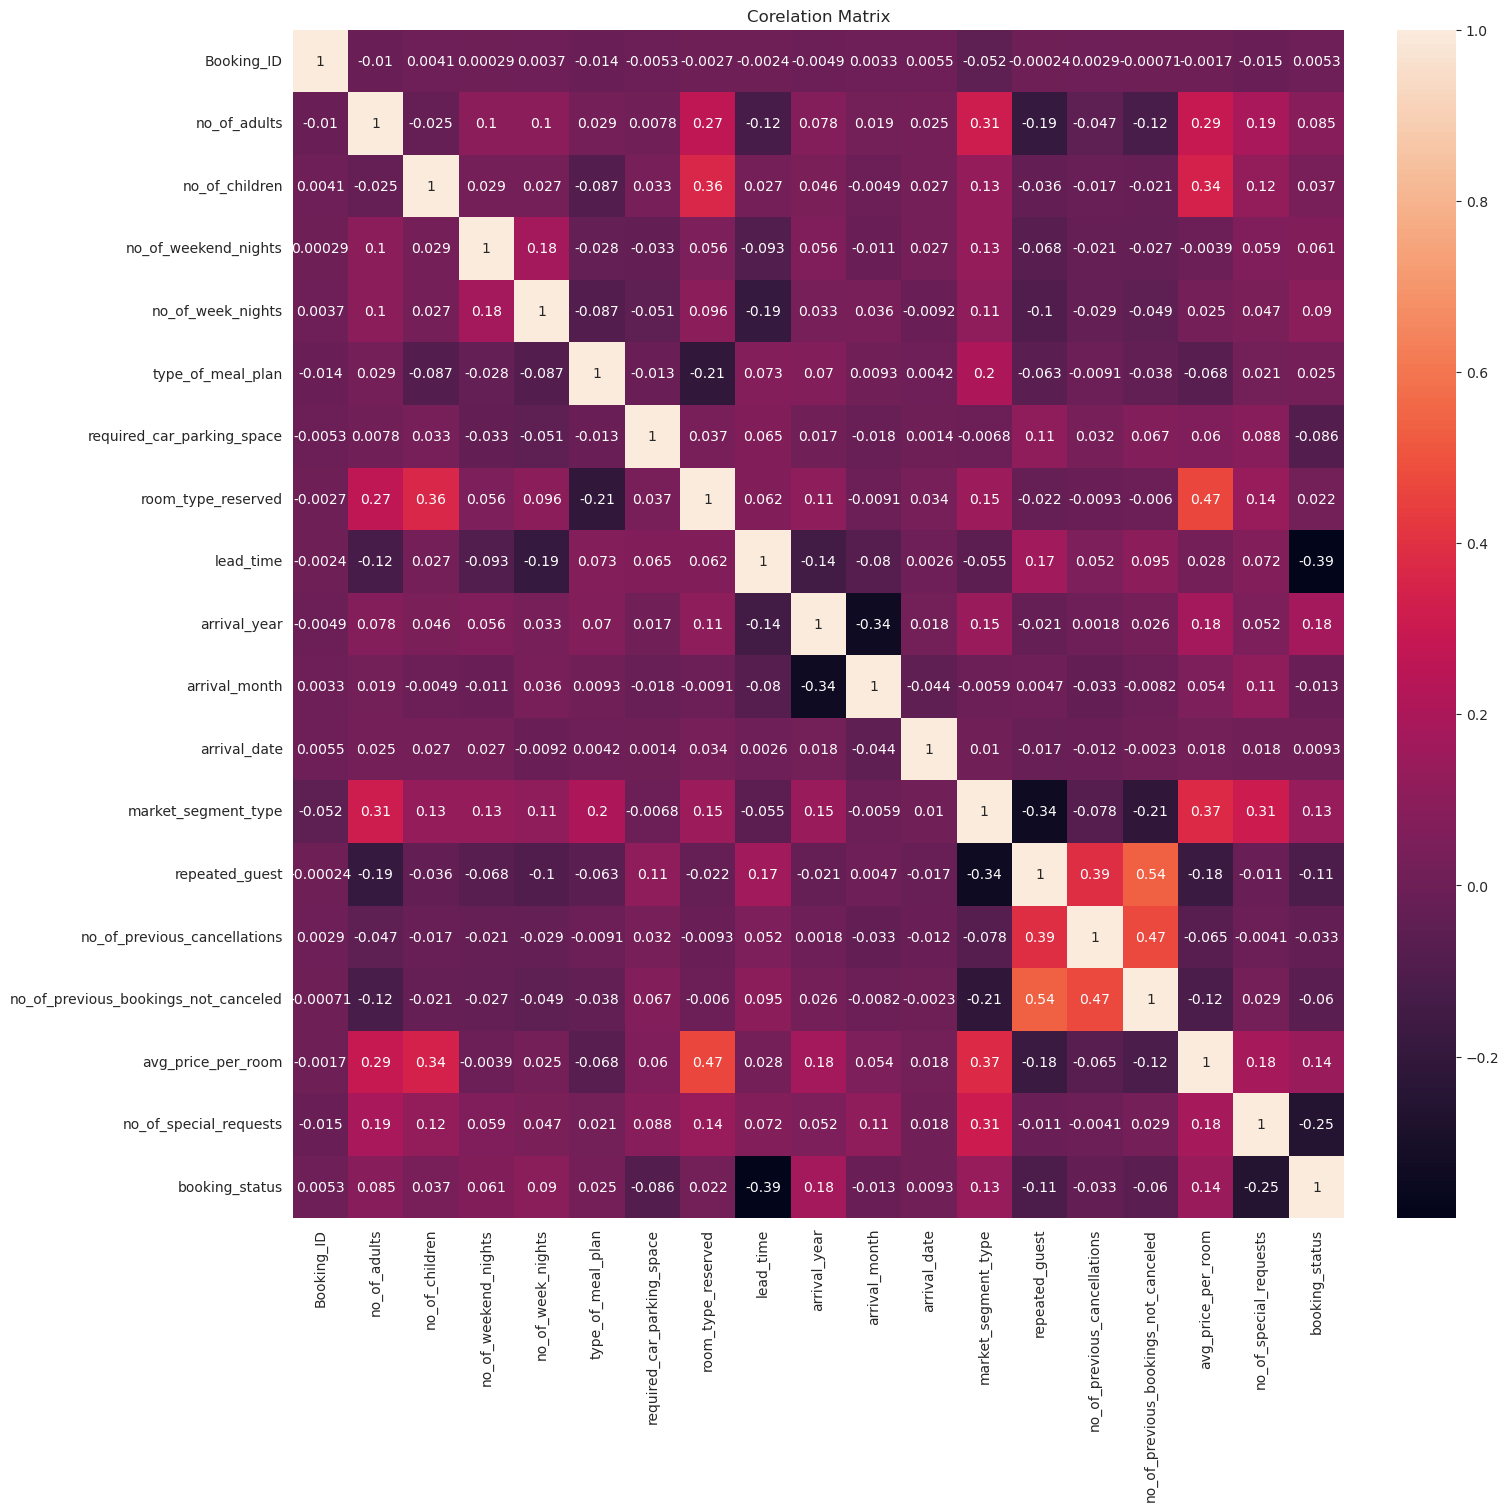

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Corelation Matrix
data = pd.concat([train_x, train_y], axis=1)
cor=data.corr()
plt.figure(figsize=(15,15),layout='constrained')
plt.title('Corelation Matrix')
sns.heatmap(cor,annot=True)
plt.show()

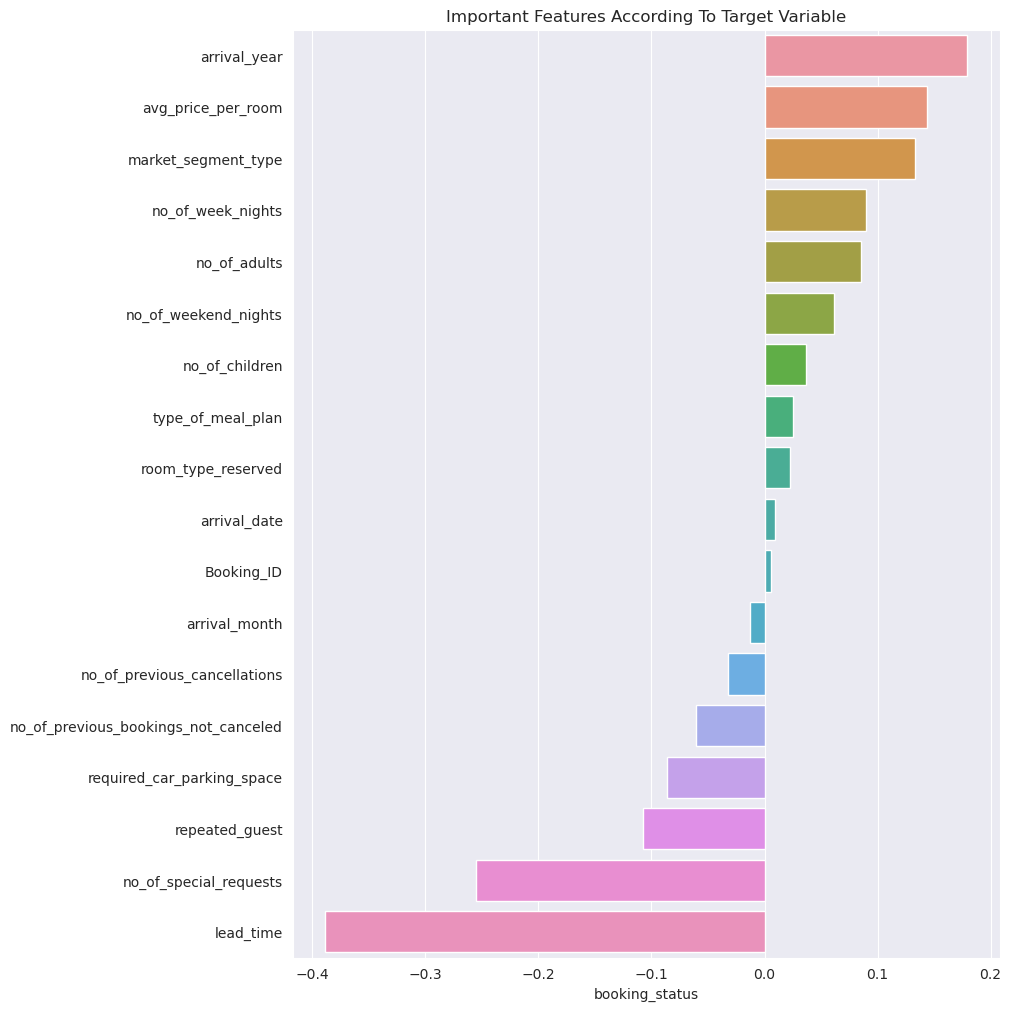

arrival_year            0.179474
avg_price_per_room      0.144076
market_segment_type     0.132677
no_of_week_nights       0.089735
no_of_adults            0.085437
no_of_weekend_nights    0.061445
no_of_children          0.037051
type_of_meal_plan       0.025282
room_type_reserved      0.022130
arrival_date            0.009252
Name: booking_status, dtype: float64

In [15]:
# Checking important features according to target variable
cor=data.corr()
target=cor['booking_status'].drop('booking_status')
target_s=target.sort_values(ascending=False)
plt.figure(figsize=(10,10),layout='constrained')
plt.title('Important Features According To Target Variable')
sns.barplot(x=target_s,y=target_s.index)
plt.show()
target_s.head(10)

In [16]:
features = target_s.index.tolist()
features.remove('Booking_ID')
features.remove('no_of_special_requests')
features.remove('lead_time')

train_x = train_x[features]
test_x = test_x[features]

In [17]:
train_x.head()

,arrival_year,avg_price_per_room,market_segment_type,no_of_week_nights,no_of_adults,no_of_weekend_nights,no_of_children,type_of_meal_plan,room_type_reserved,arrival_date,arrival_month,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,required_car_parking_space,repeated_guest
0,-1.0,-0.867758,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.933333,0.4,0.0,0.0,0.0,0.0
1,0.0,0.182116,0.0,0.5,0.0,0.5,0.0,3.0,0.0,-0.666667,0.6,0.0,0.0,0.0,0.0
2,0.0,-0.993703,0.0,-0.5,-1.0,0.5,0.0,0.0,0.0,0.800000,-1.2,0.0,0.0,0.0,0.0
3,0.0,0.013854,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.266667,-0.6,0.0,0.0,0.0,0.0
4,0.0,-0.124685,0.0,-0.5,0.0,0.0,0.0,3.0,0.0,-0.333333,-0.8,0.0,0.0,0.0,0.0


## 3. Neural Network Model

In [18]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Neural Network Model
dl_model = Sequential([keras.layers.Dense(256, activation = "relu",input_shape = [len(train_x.keys())]),
                       keras.layers.Dropout(0.3),
                       
                       keras.layers.Dense(256, activation = "relu"),
                       keras.layers.Dropout(0.3),
                       
                       keras.layers.Dense(256, activation = "relu"),
                       keras.layers.Dropout(0.3),
                       
                       keras.layers.Dense(1, activation="sigmoid")])
# Model Compilation
dl_model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
result=dl_model.fit(train_x,train_y,
                    validation_data=(test_x,test_y),
                    batch_size=256,
                    epochs=1000,
                    callbacks=[early_stopping])

2023-09-25 15:39:55.810549: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-25 15:39:55.815047: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-25 15:39:55.881213: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-25 15:39:55.882445: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 15:39:56.813842: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Epoch 1/1000
128/128 [==============================] - 2s 6ms/step - loss: 0.5828 - accuracy: 0.6800 - val_loss: 0.5594 - val_accuracy: 0.6975
Epoch 2/1000
128/128 [==============================] - 1s 5ms/step - loss: 0.5569 - accuracy: 0.7010 - val_loss: 0.5429 - val_accuracy: 0.7050
Epoch 3/1000
128/128 [==============================] - 1s 5ms/step - loss: 0.5427 - accuracy: 0.7096 - val_loss: 0.5466 - val_accuracy: 0.7028
Epoch 4/1000
128/128 [==============================] - 1s 4ms/step - loss: 0.5306 - accuracy: 0.7206 - val_loss: 0.5233 - val_accuracy: 0.7262
Epoch 5/1000
128/128 [==============================] - 1s 4ms/step - loss: 0.5233 - accuracy: 0.7244 - val_loss: 0.5173 - val_accuracy: 0.7276
Epoch 6/1000
128/128 [==============================] - 1s 4ms/step - loss: 0.5153 - accuracy: 0.7280 - val_loss: 0.5149 - val_accuracy: 0.7248
Epoch 7/1000
128/128 [==============================] - 1s 4ms/step - loss: 0.5084 - accuracy: 0.7362 - val_loss: 0.5067 - val_accuracy:

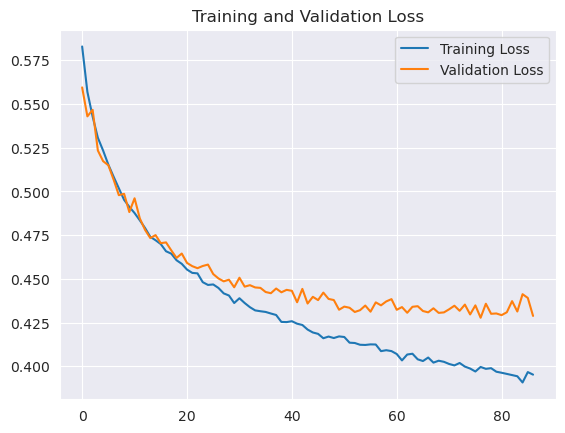

In [19]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predict the classes using the test set (if the probability is greater than 0.5, the class is 1, otherwise 0)
y_pred = dl_model.predict(test_x)
y_pred_classes = (y_pred > 0.5).astype("int32") 

# Print Accuracy, Precision, Recall, and F1 Score
print("Neural Network:")
print("Accuracy:", accuracy_score(test_y, y_pred_classes))
print("Precision:", precision_score(test_y, y_pred_classes, average='binary', pos_label=1))
print("Recall:", recall_score(test_y, y_pred_classes, average='binary', pos_label=1))
print("F1 Score:", f1_score(test_y, y_pred_classes, average='binary', pos_label=1))
print("---------------------")


114/114 [==============================] - 0s 1ms/step
Neural Network:
Accuracy: 0.7843948166528811
Precision: 0.720855614973262
Recall: 0.5640167364016736
F1 Score: 0.6328638497652582
---------------------


# 4. Other Models Training and Evaluation

In [21]:
target_col = 'booking_status'

train_data = train_set_orginal
test_data = test_set_orginal
train_data.drop(columns=['Booking_ID'], inplace=True)
test_data.drop(columns=['Booking_ID'], inplace=True)

# Drop the target variable from the train dataset and store it as the target variable
train_x = train_data.drop(columns=[target_col])
train_y = train_data[target_col]

# Drop the target variable from the test dataset and store it as the target variable
test_x = test_data.drop(columns=[target_col])
test_y = test_data[target_col]

# Convert categorical features to numerical using one-hot encoding
train_x = pd.get_dummies(train_x, drop_first=True)
test_x = pd.get_dummies(test_x, drop_first=True)

# Align test dataset columns with train dataset columns
test_x = test_x.reindex(columns=train_x.columns, fill_value=0)

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## 4.1 Decision Tree

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=3),
                           param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(train_x, train_y)

best_params = grid_search.best_params_
print("Decision Tree's Best parameters:", best_params)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Decision Tree's Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [24]:
# Initialize and train the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(**best_params, random_state=3)
decision_tree_model.fit(train_x, train_y)

# Predict on the test dataset for each model
y_pred_decision_tree = decision_tree_model.predict(test_x)

# Calculate evaluation metrics for each model
accuracy_decision_tree = accuracy_score(test_y, y_pred_decision_tree)
precision_decision_tree = precision_score(test_y, y_pred_decision_tree, average='binary', pos_label="Canceled")
recall_decision_tree = recall_score(test_y, y_pred_decision_tree, average='binary', pos_label="Canceled")
f1_decision_tree = f1_score(test_y, y_pred_decision_tree, average='binary', pos_label="Canceled")

# Print evaluation metrics for each model
print("Decision Tree:")
print("Accuracy:", accuracy_decision_tree)
print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)
print("F1 Score:", f1_decision_tree)
print("---------------------")


Decision Tree:
Accuracy: 0.8726220016542597
Precision: 0.8051623646960866
Recall: 0.8092050209205021
F1 Score: 0.8071786310517529
---------------------


## 4.2 Naive Bayes

In [25]:
# Initialize and train the Naive Bayes Classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(train_x, train_y)

# Predict on the test dataset for each model
y_pred_naive_bayes = naive_bayes_model.predict(test_x)

# Calculate evaluation metrics for each model
accuracy_naive_bayes = accuracy_score(test_y, y_pred_naive_bayes)
precision_naive_bayes = precision_score(test_y, y_pred_naive_bayes, average='binary', pos_label="Canceled")
recall_naive_bayes = recall_score(test_y, y_pred_naive_bayes, average='binary', pos_label="Canceled")
f1_naive_bayes = f1_score(test_y, y_pred_naive_bayes, average='binary', pos_label="Canceled")

# Print evaluation metrics for each model
print("Naive Bayes:")
print("Accuracy:", accuracy_naive_bayes)
print("Precision:", precision_naive_bayes)
print("Recall:", recall_naive_bayes)
print("F1 Score:", f1_naive_bayes)
print("---------------------")


Naive Bayes:
Accuracy: 0.41494347945960847
Precision: 0.35707678075855687
Recall: 0.9690376569037656
F1 Score: 0.5218566922036953
---------------------


## 4.3 Random Forest

In [26]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=3),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(train_x, train_y)

best_params = grid_search.best_params_
print("Random Forest's Best parameters:", best_params)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Random Forest's Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [27]:
# Initialize and train the Random Forest Classifier
random_forest_model = RandomForestClassifier(**best_params, random_state=3)
random_forest_model.fit(train_x, train_y)

# Predict on the test dataset for each model
y_pred_random_forest = random_forest_model.predict(test_x)

# Calculate evaluation metrics for each model
accuracy_random_forest = accuracy_score(test_y, y_pred_random_forest)
precision_random_forest = precision_score(test_y, y_pred_random_forest, average='binary', pos_label="Canceled""")
recall_random_forest = recall_score(test_y, y_pred_random_forest, average='binary', pos_label="Canceled")
f1_random_forest = f1_score(test_y, y_pred_random_forest, average='binary', pos_label="Canceled")

# Print evaluation metrics for each model
print("Random Forest:")
print("Accuracy:", accuracy_random_forest)
print("Precision:", precision_random_forest)
print("Recall:", recall_random_forest)
print("F1 Score:", f1_random_forest)
print("---------------------")


Random Forest:
Accuracy: 0.9018472566859663
Precision: 0.8817106460418562
Recall: 0.8108786610878661
F1 Score: 0.8448125544899738
---------------------


## 4.4 Support Vector Machine

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define hyperparameter grid
param_grid = {
    'C': [1, 10],
    'kernel': ['linear'],
    'gamma': [1, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=3), param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=2)

# Fit to the training data
grid_search.fit(train_x, train_y)

# Retrieve the best model
best_params = grid_search.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [32]:
best_params

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [31]:
# Initialize and train the Support Vector Machine (SVM) Classifier
svm_model = SVC(**best_params, random_state=3)
svm_model.fit(train_x, train_y)

# Predict on the test dataset for each model
y_pred_svm = svm_model.predict(test_x)  

# Calculate evaluation metrics for each model
accuracy_svm = accuracy_score(test_y, y_pred_svm)  
precision_svm = precision_score(test_y, y_pred_svm, average='binary', pos_label="Canceled") 
recall_svm = recall_score(test_y, y_pred_svm, average='binary', pos_label="Canceled")  
f1_svm = f1_score(test_y, y_pred_svm, average='binary', pos_label="Canceled")  

# Print evaluation metrics for each model
print("Support Vector Machine (SVM):")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("---------------------")


Support Vector Machine (SVM):
Accuracy: 0.8067273228563551
Precision: 0.7282809611829945
Recall: 0.6594142259414226
F1 Score: 0.6921387790953009
---------------------
